Import the Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

Load the data

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Scale the data

In [3]:
x_train = x_train / 255
x_test = x_test / 255

Build the Model

In [8]:
model = Sequential()

# First Convolutional layer
model.add(Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3),
                 activation='relu'))

# First Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

# Second Convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))

# Second Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)              

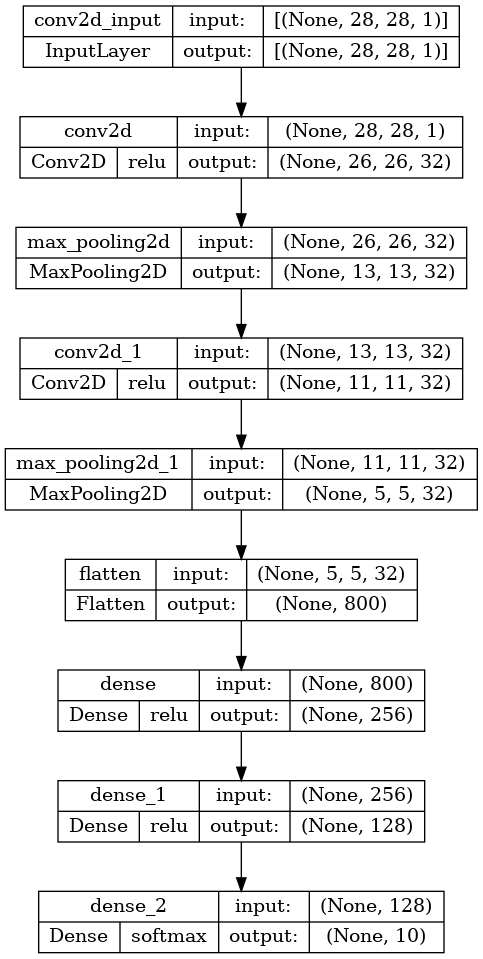

In [10]:
plot_model(model, show_layer_activations=True, show_layer_names=True, show_shapes=True)

Compile the model

In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train the model

In [13]:
model.fit(x_train,y_train, epochs = 10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 48s 8ms/step - loss: 0.0616 - accuracy: 0.9813
Epoch 2/10
6000/6000 [==============================] - 48s 8ms/step - loss: 0.0386 - accuracy: 0.9885
Epoch 3/10
6000/6000 [==============================] - 50s 8ms/step - loss: 0.0270 - accuracy: 0.9916
Epoch 4/10
6000/6000 [==============================] - 49s 8ms/step - loss: 0.0223 - accuracy: 0.9936
Epoch 5/10
6000/6000 [==============================] - 49s 8ms/step - loss: 0.0197 - accuracy: 0.9940
Epoch 6/10
6000/6000 [==============================] - 47s 8ms/step - loss: 0.0167 - accuracy: 0.9953
Epoch 7/10
6000/6000 [==============================] - 47s 8ms/step - loss: 0.0147 - accuracy: 0.9958
Epoch 8/10
6000/6000 [==============================] - 47s 8ms/step - loss: 0.0142 - accuracy: 0.9958
Epoch 9/10
6000/6000 [==============================] - 47s 8ms/step - loss: 0.0130 - accuracy: 0.9965
Epoch 10/10
6000/6000 [==============================] - 49s 8ms/step - l

Evaluate on Test Data

In [15]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 41s 4ms/step - loss: 26.3080 - accuracy: 0.9880


[26.3079776763916, 0.9879999756813049]

Predict new Image

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
new = x_test[2345]

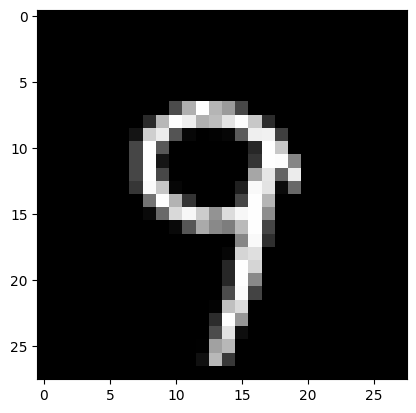

In [36]:
plt.imshow(new, cmap='gray')

In [37]:
new = new / 255
y = model.predict(new.reshape(1,28,28))

# or

new = new / 255
new= new.reshape(1,28,28)
result = model.predict(new)
np.argmax(result)

1/1 [==============================] - 0s 21ms/step


1

Predict on Screenshot

In [31]:
import cv2
ss_cv = cv2.imread('/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/Day 16/PredictScreenshot20Jun.png',0)
ss_cv.shape

(225, 226)

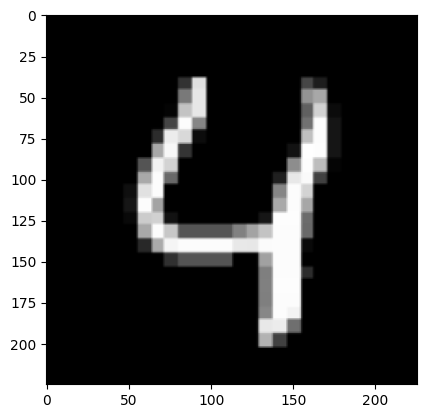

In [32]:
plt.imshow(ss_cv, cmap='gray')

In [33]:
ss_cv = cv2.resize(ss_cv, (28,28))
ss_cv = ss_cv / 255
ss_cv= ss_cv.reshape(1,28,28)
result = model.predict(ss_cv)
np.argmax(result)

1/1 [==============================] - 0s 25ms/step


4